In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('house_price.csv')

In [4]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# EDA

In [5]:
df['Address'].fillna(method='ffill',inplace=True)

In [6]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [7]:
def str_to_int(x):
    return int(''.join(x.split(",")))

In [8]:
new_Area=df.Area.apply(lambda x: str_to_int(x))

In [9]:
df['new_Area']=new_Area

In [10]:
df.nlargest(10,['new_Area'])

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),new_Area
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67,16160000000
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00,8400000000
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33,3310000000
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00,2550000000
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00,3600
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33,1000
1694,929,5,True,True,False,Zafar,8.000000e+10,2666666.67,929
1974,900,3,True,True,False,Damavand,8.500000e+09,283333.33,900
573,863,2,True,True,True,Gheitarieh,7.830000e+09,261000.00,863
831,750,5,True,True,True,Mahmoudieh,7.500000e+10,2500000.00,750


In [11]:
df.new_Area.replace([16160000000,8400000000,3310000000,2550000000], [1616,840,331,255] ,inplace=True)

In [12]:
cdf=df.drop(columns=['Area'])

In [13]:
cdf['Parking']=cdf['Parking'].astype(int)

In [14]:
cdf['Warehouse']=cdf['Warehouse'].astype(int)

In [15]:
cdf['Elevator']=cdf['Elevator'].astype(int)

In [16]:
from collections import Counter

In [17]:
from collections import Counter
def cumulatively_categorise(column):
    threshold=0.75
    return_categories_list=True

    threshold_value=int(threshold*len(column))
 
 
    categories_list=[]

    s=0
  
    counts=Counter(column)
 
    for i,j in counts.most_common():
 
         s+=dict(counts)[i]
    
         categories_list.append(i)

         if s>=threshold_value:
             break
  
    categories_list.append('Other')

    new_column=column.apply(lambda x: x if x in categories_list else 'Other')

 
    if(return_categories_list):
        return new_column,categories_list

    else:
        return new_column



In [18]:
transformed_column,new_category_list=cumulatively_categorise(cdf['Address'])

In [19]:
d=pd.DataFrame(0,index=np.arange(len(cdf)),columns=new_category_list)

In [20]:
for i,el in enumerate(cdf['Address']):
    if el in new_category_list:
        d[el][i]=1
    else:
        d['Other'][i]=1        

In [21]:
cdf=cdf.join(d)

In [22]:
cdf.drop(columns=['Address'],inplace=True)

In [23]:
cdf

,Room,Parking,Warehouse,Elevator,Price,Price(USD),new_Area,Punak,Pardis,West Ferdows Boulevard,...,Qasr-od-Dasht,North Program Organization,Narmak,Zaferanieh,Beryanak,Aqdasieh,Pakdasht,Azarbaijan,Southern Program Organization,Other
0,1,1,1,1,1.850000e+09,61666.67,63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1.850000e+09,61666.67,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,5.500000e+08,18333.33,79,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,9.025000e+08,30083.33,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,7.000000e+09,233333.33,123,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,2,1,1,1,3.500000e+09,116666.67,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,2,1,1,1,6.800000e+09,226666.67,83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,2,0,0,0,3.650000e+08,12166.67,75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,2,1,1,1,5.600000e+09,186666.67,105,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# ML

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
import sklearn.metrics as metrics

In [28]:
x=cdf.drop(['Price','Price(USD)'],axis=1)
y=cdf[['Price(USD)']]

In [29]:
x_std = StandardScaler().fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y, test_size=0.20, random_state=42)

In [31]:
lr=LinearRegression().fit(x_train,y_train)

In [32]:
y_pred=lr.predict(x_test)

In [33]:
lr.intercept_

array([181250.85270212])

In [34]:
lr.coef_

array([[ 5.29806209e+04, -4.44739497e+03,  3.18945470e+03,
         5.79486463e+03,  1.52448539e+05, -7.97754072e+17,
        -7.61640361e+17, -7.59159221e+17, -7.49136680e+17,
        -7.33797840e+17, -7.18072073e+17, -7.12739758e+17,
        -6.65405394e+17, -6.17043478e+17, -6.07491630e+17,
        -6.04270209e+17, -5.94489266e+17, -5.77778894e+17,
        -5.77778894e+17, -5.46277363e+17, -5.31619995e+17,
        -5.24124067e+17, -5.20332196e+17, -5.04856547e+17,
        -4.92905838e+17, -4.88852505e+17, -4.84762839e+17,
        -4.32468624e+17, -4.13478753e+17, -3.98611947e+17,
        -3.93525538e+17, -3.93525538e+17, -3.66989292e+17,
        -3.38290874e+17, -3.32243170e+17, -3.32243170e+17,
        -3.32243170e+17, -3.26079690e+17, -3.19793740e+17,
        -3.19793740e+17, -3.13377949e+17, -3.06824172e+17,
        -1.63198417e+18]])

In [35]:
metrics.mean_squared_error(y_test, y_pred)

64227388525.46122

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.19290645693262531

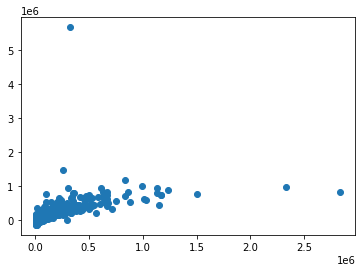

In [73]:
plt.scatter(y_test,y_pred)

In [37]:
# plt.plot(x_test[:,0],y_pred)

# With three feature

In [38]:
new_cdf=cdf[['Room','Parking','new_Area','Price(USD)']]
x_new=cdf[['Room','Parking','new_Area']]
y_new=cdf[['Price(USD)']]

In [39]:
new_cdf

,Room,Parking,new_Area,Price(USD)
0,1,1,63,61666.67
1,1,1,60,61666.67
2,2,1,79,18333.33
3,2,1,95,30083.33
4,2,1,123,233333.33
...,...,...,...,...
3474,2,1,86,116666.67
3475,2,1,83,226666.67
3476,2,0,75,12166.67
3477,2,1,105,186666.67


In [40]:
x_std_two = StandardScaler().fit_transform(x_new)

In [41]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_std_two,y_new, test_size=0.20, random_state=42)

In [42]:
model=LinearRegression().fit(x_train_,y_train_)

In [43]:
y_pred_=model.predict(x_test_)

In [44]:
model.intercept_

array([181918.12897551])

In [45]:
model.coef_

array([[ 67140.80080486,   8859.74794384, 172489.37617147]])

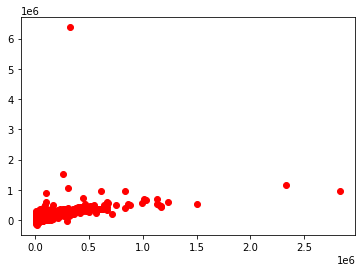

In [46]:
plt.scatter(y_test_,y_pred_,color='r' );

In [47]:
metrics.mean_squared_error(y_test_, y_pred_)

80027811097.22824

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test_, y_pred_)

-0.4863704532253119

# Lasso

In [50]:
from sklearn.linear_model import Lasso

In [51]:
Lasso_model=Lasso(alpha=0.1)

In [52]:
Lasso_model.fit(x_new,y_new)

Lasso(alpha=0.1)

In [53]:
c=Lasso_model.coef_
c

array([140480.07763764,  30980.18948286,    930.12868045])

([<matplotlib.axis.XTick at 0x13ad4e8ec20>,
 [Text(0, 0, 'Room'), Text(1, 0, 'Parking'), Text(2, 0, 'new_Area')])

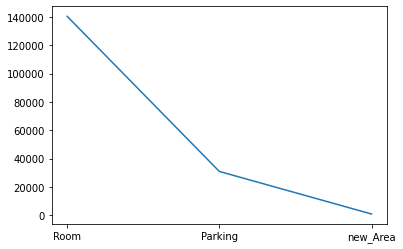

In [54]:
plt.plot(range(3),c)
plt.xticks(range(3),['Room','Parking','new_Area'])

# Cross_Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [57]:
scores=cross_val_score(model,x_new,y_new,cv=5,scoring='r2')
scores

array([ 0.47134474,  0.44247108,  0.45326992, -0.49568665,  0.22561321])

In [58]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [59]:
lm = LinearRegression()
lm.fit(x_train_, y_train_)
rfe = RFE(lm)

In [60]:
hyper_params = [{'n_features_to_select': list(range(1, 4))}]

In [61]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_, y_train_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
y_pred__ = lm.predict(x_test_)
r2 = metrics.r2_score(y_test_, y_pred__)

In [63]:
r2

-0.4863704532253119

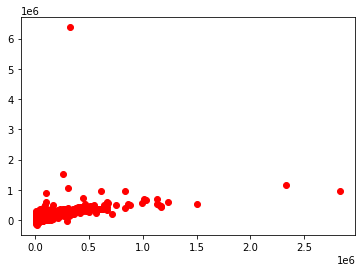

In [64]:
plt.scatter(y_test_,y_pred_,color='r' );